<a href="https://colab.research.google.com/github/javierarteagapuell/deeplearning/blob/main/Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [367]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [368]:
data = pd.read_csv('banco ufv.csv', encoding='latin-1', sep=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [369]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [370]:
#data.to.csv('banco_nuevo.csv', index=False)

In [371]:
data.isnull().values.any() # Este código nos devolverá True si hay algún valor NaN en nuestro DataFrame.

False

In [372]:
any(data.duplicated())

False

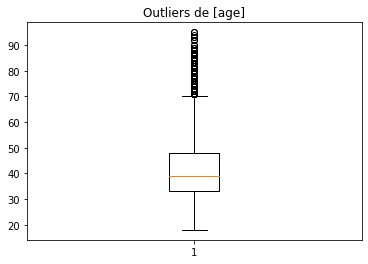

In [373]:
#HAY VALORES ATÍPICOS

#np.unique(arr, return_counts=True)

for i in data.columns:
  arr = data[i]
  plt.boxplot(arr)
  plt.title("Outliers de [{0}]".format(i))
  plt.show()
  break


In [374]:
data=data.drop(['job','marital','default','housing','loan','contact','day','month','campaign','pdays','previous','poutcome','y'], axis=1)
data.head()
# NOS QUEDAMOS CON: age (años), education (educación), balance (saldo) y duration (días como cliente)

,age,education,balance,duration
0,58,tertiary,2143,261
1,44,secondary,29,151
2,33,secondary,2,76
3,47,unknown,1506,92
4,33,unknown,1,198


In [375]:
#COLUMNAS CON LAS QUE NOS HEMOS QUESADO
data.columns

Index(['age', 'education', 'balance', 'duration'], dtype='object')

In [376]:
#PASAR LA VARIBALE EDUCATION DE CATEGÓRICA A NUMÉRICA

education_act=pd.get_dummies(data["education"])
education_new=education_act.drop(['unknown'], axis=1)
education_new

,primary,secondary,tertiary
0,0,0,1
1,0,1,0
2,0,1,0
3,0,0,0
4,0,0,0
...,...,...,...
45206,0,0,1
45207,1,0,0
45208,0,1,0
45209,0,1,0


In [377]:
data=data.drop(['education'], axis=1)
data

,age,balance,duration
0,58,2143,261
1,44,29,151
2,33,2,76
3,47,1506,92
4,33,1,198
...,...,...,...
45206,51,825,977
45207,71,1729,456
45208,72,5715,1127
45209,57,668,508


In [378]:
data = pd.concat([data, education_new], axis=1)
data

,age,balance,duration,primary,secondary,tertiary
0,58,2143,261,0,0,1
1,44,29,151,0,1,0
2,33,2,76,0,1,0
3,47,1506,92,0,0,0
4,33,1,198,0,0,0
...,...,...,...,...,...,...
45206,51,825,977,0,0,1
45207,71,1729,456,1,0,0
45208,72,5715,1127,0,1,0
45209,57,668,508,0,1,0


¿Está directamente relacionado el nivel de estudios con el saldo de cada 
cliente en la cuenta?

¿education con balance?

In [379]:
#np.corrcoef('education_new', 'balance')
data['education_new'].corr(data['balance'])

#plt.scatter('education', 'balance')
#plt.show()

KeyError: ignored

Para ello estableceremos 3 rangos numéricos: los que tienen deudas, la gente que tiene 
unos ahorros normales (en positivo, pero menos de 10.000 euros) y los que disponen de suficientes ahorros 
como para ofrecerles paquetes de inversión (aquellos en positivo con más de 10.000 euros). 

In [ ]:
Deuda = data['balance'].apply(lambda val: val  <0 )
Ahorros = data['balance'].apply(lambda val: val>=0) & data['balance'].apply(lambda val: val<=10000)
Paquetes_De_Inversión = data['balance'].apply(lambda val: val >10000)

Num_Deuda=sum(bool(x) for x in Deuda)
Num_Ahorros=sum(bool(x) for x in Ahorros)  
Num_Paquetes_De_Inversión=sum(bool(x) for x in Paquetes_De_Inversión)

Num_Total=len(data['balance'])

Porcentaje_Num_Deuda=(Num_Deuda/Num_Total)*100
Porcentaje_Num_Ahorros=(Num_Ahorros/Num_Total)*100
Porcentaje_Num_Paquetes_De_Inversión=(Num_Paquetes_De_Inversión/Num_Total)*100

print("El numero de personas con deudas es de: ", Num_Deuda, "que es un", Porcentaje_Num_Deuda, "%")
print("El numero de personas con ahorros es de: ", Num_Ahorros, "que es un", Porcentaje_Num_Ahorros, "%")
print("El numero de personas con paquetes de inversión es de: ", Num_Paquetes_De_Inversión, "que es un", Porcentaje_Num_Paquetes_De_Inversión, "%")

Imprimimos los sueldos

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Num_Deuda, Num_Ahorros, Num_Paquetes_De_Inversión])
mylabels= ["Num_Deuda (8.32%)", "Num_Ahorros (89.83%)", "Num_Paquetes_De_Inversión (1.83%)"]

plt.pie(y, startangle = 90)
plt.legend(labels = mylabels, loc="best")
plt.show() 


Hacer una transformación:
Alumnos hasta  30  años.  Trabajadores  jóvenes 
  30  a 45  años,  trabajadores  veteranos de  46  a 65  y el  resto  serán  clientes  no 
vinculados a la Universidad. Obten un gráfico donde podamos ver como se distribuye cada clase. Interpreta 
los datos. 

In [ ]:
#conditionlist2 = [(data['age'] <= 30) ,
#    (data['age'] > 30) & (data['age']  <= 45),
#    (data['age'] > 45)]
#choicelist2 = ['Alumnos ', 'Trabajadores Jóvenes', 'Trabajadores Veteranos']
#data['age'] = np.select(conditionlist2, choicelist2, default='Not Specified')


In [ ]:
Alumnos = data['age'].apply(lambda val: val  <30 )
Trabajadores_Jóvenes = data['age'].apply(lambda val: val>=30) & data['age'].apply(lambda val: val<=45)
Trabajadores_Veteranos = data['age'].apply(lambda val: val>45) & data['age'].apply(lambda val: val<=65)
Jubilados= data['age'].apply(lambda val: val >65)

Num_Alumnos=sum(bool(x) for x in Alumnos)
Num_Trabajadores_Jóvenes=sum(bool(x) for x in Trabajadores_Jóvenes)  
Num_Trabajadores_Veteranos=sum(bool(x) for x in Trabajadores_Veteranos)
Num_Jubilados=sum(bool(x) for x in Jubilados)

Num_Total=len(data['age'])

Porcentaje_Num_Alumnos=(Num_Alumnos/Num_Total)*100
Porcentaje_Num_Trabajadores_Jóvenes=(Num_Trabajadores_Jóvenes/Num_Total)*100
Porcentaje_Num_Trabajadores_Veteranos=(Num_Trabajadores_Veteranos/Num_Total)*100
Porcentaje_Num_Jubilados=(Num_Jubilados/Num_Total)*100

print("El numero de personas con alumnos es de: ", Num_Alumnos, "que es un", Porcentaje_Num_Alumnos, "%")
print("El numero de personas con trabadores jóvenes es de: ", Num_Trabajadores_Jóvenes, "que es un", Porcentaje_Num_Trabajadores_Jóvenes, "%")
print("El numero de personas con trabadores veteranos es de: ", Num_Trabajadores_Veteranos, "que es un", Porcentaje_Num_Trabajadores_Veteranos, "%")
print("El numero de personas con jubilados es de: ", Num_Jubilados, "que es un", Porcentaje_Num_Jubilados, "%")



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

y = np.array([Num_Alumnos, Num_Trabajadores_Jóvenes, Num_Trabajadores_Veteranos, Num_Jubilados])
mylabels= ["Num_Alumnos", "Num_Trabajadores_Jóvenes", "Num_Trabajadores_Veteranos", "Num_Jubilados"]

plt.pie(y, labels = mylabels, autopct="%0.1f %%" , startangle = 90)
plt.show() 


Pasamos el tiempo que llevan los clientes de esta empresa de días a años

In [ ]:
data.duration=data.duration/365
data

Hacemos una distribución de frecuencia para mostrar como están repartidos los clientes respecto al nº de años que llevan en la empresa 

In [ ]:
# Distribución de frecuencia.
# 1ro creamos un rango para las categorías.

particiones = np.arange(0, 7, 0.5)

# luego cortamos los datos en cada contenedor 
frec = pd.cut(data['duration'], particiones)

# por último hacemos el recuento de los contenedores
# para armar la tabla de frecuencia.
tabla_frec = pd.value_counts(frec)
tabla_frec


In [ ]:
particiones = np.arange(0, 7, 0.5)
plt.hist(data['duration'], particiones)
plt.xlabel("Años en la empresa")
plt.ylabel("N° de clientes")
plt.show()